In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [4]:
df= pd.read_csv("retailsfinal.csv")
features= ['Montant_Sollicité','Revenu_Annuel','Retenu_Mensuel',
           'secteur_EMPLOYE','secteur_INCONNU','secteur_LIBERAL','secteur_RETRAITES',
           'typecanevas_AUTO','typecanevas_CONSO','typecanevas_IMMO','sexe_F','sexe_M','age']
x = df.loc[:, features].values
x

y= df.iloc[:, 9].values
y=df['Décision_Finale']
y



0        0
1        0
2        0
3        0
4        0
        ..
57285    0
57286    0
57287    0
57288    0
57289    0
Name: Décision_Finale, Length: 57290, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve


In [15]:
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [8]:
print(grid_search.best_params_)


{'n_neighbors': 28}


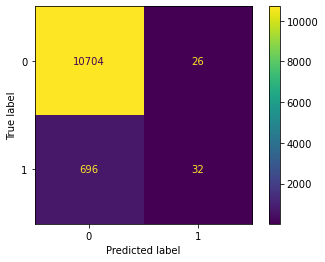

In [13]:
plot_confusion_matrix(grid,x_test, y_test,values_format='d' )


In [16]:
y_pred = grid.predict(x_test)


In [17]:
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.6673967362230278 with param: {'n_neighbors': 30}
